<h1>Task 1:
Read the dataset from the below link
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_
Names/US_Baby_Names_right.csv</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
us_baby= pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv")

In [4]:
us_baby[:6]

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37


<h1>1. Delete unnamed columns</h1>

In [3]:

us_baby_unnamed=us_baby.drop(us_baby.columns[us_baby.columns.str.contains('unnamed',case = False)],axis = 1,inplace=True)


In [4]:
us_baby.head() #column unnanmed:0 is removed

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


<h1>#2. Show the distribution of male and female</h1>

In [7]:
us_baby.groupby('Gender').size() #to check sizeof Male and female

Gender
F    558846
M    457549
dtype: int64

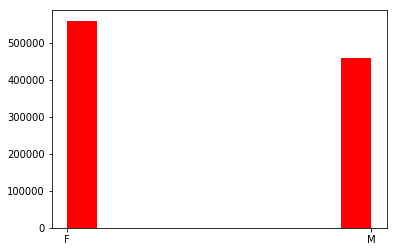

In [8]:

plt.hist(us_baby["Gender"] ,color='R')
plt.show()

# 3. Show the top 5 most preferred names

In [9]:
ordered= us_baby['Name'].value_counts()
ordered.head()


Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Name, dtype: int64

<h1>4. What is the median name occurence in the dataset</h1>

In [12]:
us_baby['Count'].median()

11.0

In [14]:
index=np.where(us_baby["Count"].median() == 11.0)

In [15]:
us_baby.loc[index]

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62


<h1>5. Distribution of male and female born count by states</h1>

In [6]:
outp=us_baby.groupby(['State','Gender']).sum()

In [8]:
outp['Count']

State  Gender
AK     F           26250
       M           37399
AL     F          215308
       M          260114
AR     F          129712
       M          162947
AZ     F          368567
       M          439691
CA     F         2414063
       M         2670584
CO     F          260805
       M          313425
CT     F          141350
       M          171397
DC     F           35276
       M           47228
DE     F           31312
       M           41748
FL     F          915422
       M         1060957
GA     F          549637
       M          635531
HI     F           37279
       M           53127
IA     F          144764
       M          174009
ID     F           72808
       M           94320
IL     F          695312
       M          791679
                  ...   
OK     F          184967
       M          228613
OR     F          172111
       M          209445
PA     F          593382
       M          682709
RI     F           35560
       M           47939
SC     F   

<h1>Task 2</h1>

<h1>We have the min and max temperatures in a city In India for each months of the year. We
would like to find a function to describe this and show it graphically, the dataset given below.</h1>

<h1>1. fitting it to the periodic function</h1>

In [23]:
Max=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])

In [24]:
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [25]:
months=np.arange(12)

Text(0,0.5,'Min and Max temperatues')

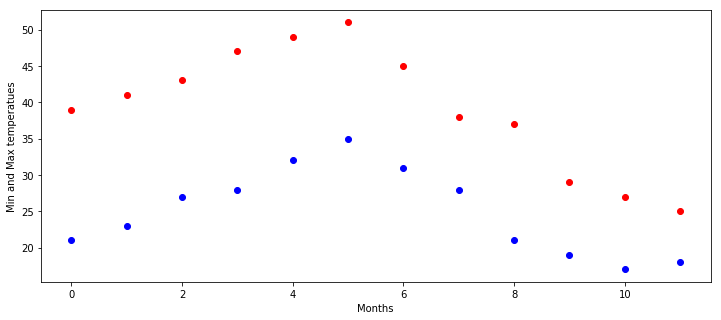

In [32]:
plt.figure(figsize=(12,5))      #here x axis is 12 cm and y axis is 5 cm
plt.plot(months,Max,'ro')#   'ro' for red dots for max values
plt.plot(months,Min,'bo')   # 'bo' for blue dots for minn values
plt.xlabel('Months')
plt.ylabel('Min and Max temperatues')

In [28]:
from scipy import optimize
def yearly_temps(times,avg,ampl,time_offset):   # 
    return(avg+ampl*np.cos((times+time_offset)*2*np.pi/times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps,months,Max, [20,10,0])   # here 20 is avg. ,10 amplitude and 0 is time offset
res_min, cov_min = optimize.curve_fit(yearly_temps, months,Min, [-40,20,0])

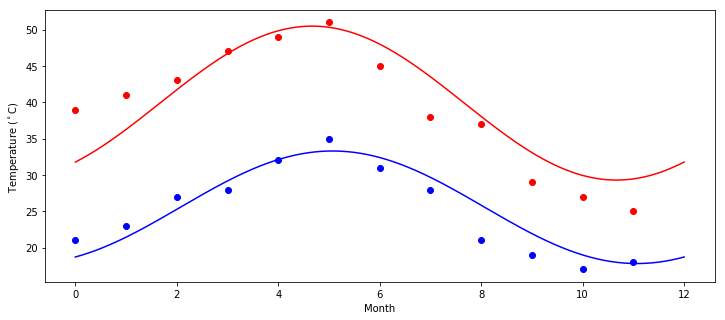

In [31]:
days=np.linspace(0,12,num=365)#0 is lower limit and 12 is upper limit and 365 are intervals
plt.figure(figsize=(12,5))
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-') #to draw fitted line going through all the points
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')#to draw fitted line going through all the points
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()